<a href="https://colab.research.google.com/github/nilarami/590V-HackHer413/blob/master/ML_Assignment1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grab Dataset

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
def categorize_income(income):

    if '<=50K' in income:
        return 0
    elif '>50K' in income:
        return 1
    else:
        print(income)
        return None  # or handle other cases as needed

def grab_adult_income_dataset():
    # Fetch dataset
    adult = fetch_ucirepo(id=2)

    # Data (as pandas dataframes)
    X = pd.DataFrame(adult.data.features)
    y = pd.DataFrame(adult.data.targets, columns=['income'])

    # Define categorical columns
    categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

    # Label encoding for categorical columns
    X[categorical_columns] = X[categorical_columns].apply(lambda col: pd.Categorical(col).codes)

    # Categorize 'income' column
    y['income'] = y['income'].apply(categorize_income)

    return X, y['income']


def preprocess_adult_income_data(X, y, test_size = 0.2, random_state=None):
  # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  y_train = y_train.values.reshape(-1)
  y_test = y_test.values.reshape(-1)

  return x_train, x_test, y_train, y_test



In [16]:
def grab_breast_cancer_dataset():
  # fetch dataset
  breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
  # data (as pandas dataframes)
  X = breast_cancer_wisconsin_diagnostic.data.features
  y = breast_cancer_wisconsin_diagnostic.data.targets

  return X,y

def preprocess_data(X, y, test_size=0.2, random_state=None):

  #Numerize y data
  y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})

  # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  y_train = y_train.values.reshape(-1)
  y_test = y_test.values.reshape(-1)


  return x_train, x_test, y_train, y_test


In [21]:
#taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV

def plot_learning_curve(clf, X, y, title="Insert Title"):
    n = len(y)
    train_mean = []
    train_std = []  # model performance score (f1)
    cv_mean = []
    cv_std = []  # model performance score (f1)
    fit_mean = []
    fit_std = []  # model fit/training time
    pred_mean = []
    pred_std = []  # model test/prediction times
    train_sizes = (np.linspace(.05, 1.0, 20) * n).astype('int')

    for i in train_sizes:
        idx = np.random.randint(X.shape[0], size=i)
        X_subset = X.iloc[idx, :]  # Use idx directly without [0] to get all selected samples
        y_subset = y.iloc[idx]  # Use idx directly without [0] to get all selected samples
        scores = cross_validate(clf, X_subset, y_subset, cv=5, scoring='f1', n_jobs=-1, return_train_score=True)

        train_mean.append(np.mean(scores['train_score']))
        train_std.append(np.std(scores['train_score']))
        cv_mean.append(np.mean(scores['test_score']))
        cv_std.append(np.std(scores['test_score']))
        fit_mean.append(np.mean(scores['fit_time']))
        fit_std.append(np.std(scores['fit_time']))
        pred_mean.append(np.mean(scores['score_time']))
        pred_std.append(np.std(scores['score_time']))

    train_mean = np.array(train_mean)
    train_std = np.array(train_std)
    cv_mean = np.array(cv_mean)
    cv_std = np.array(cv_std)
    fit_mean = np.array(fit_mean)
    fit_std = np.array(fit_std)
    pred_mean = np.array(pred_mean)
    pred_std = np.array(pred_std)

    plot_LC(train_sizes, train_mean, train_std, cv_mean, cv_std, title)
    plot_times(train_sizes, fit_mean, fit_std, pred_mean, pred_std, title)

    return train_sizes, train_mean, fit_mean, pred_mean


def plot_LC(train_sizes, train_mean, train_std, cv_mean, cv_std, title):

    plt.figure()
    plt.title("Learning Curve: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model F1 Score")
    plt.fill_between(train_sizes, train_mean - 2*train_std, train_mean + 2*train_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, cv_mean - 2*cv_std, cv_mean + 2*cv_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training Score")
    plt.plot(train_sizes, cv_mean, 'o-', color="r", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()


def plot_times(train_sizes, fit_mean, fit_std, pred_mean, pred_std, title):

    plt.figure()
    plt.title("Modeling Time: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Training Time (s)")
    plt.fill_between(train_sizes, fit_mean - 2*fit_std, fit_mean + 2*fit_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, pred_mean - 2*pred_std, pred_mean + 2*pred_std, alpha=0.1, color="r")
    plt.plot(train_sizes, fit_mean, 'o-', color="b", label="Training Time (s)")
    plt.plot(train_sizes, pred_std, 'o-', color="r", label="Prediction Time (s)")
    plt.legend(loc="best")
    plt.show()

In [9]:
#GENERAL GRAPHS and Evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X_test, y_test, class_names, title):

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap for visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def evaluate_classifier(classifier, x_train, y_train, x_test, y_test):

    # Make predictions on the testing data
    y_pred = classifier.predict(x_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return accuracy, precision, recall, f1


In [10]:
#FUNCTIONS FOR DECISION TREE CLASSIFIER
def grid_search_decision_tree(x_train, y_train, cv=5):

    param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

    dt_classifier = DecisionTreeClassifier()

    grid_search = GridSearchCV(dt_classifier, param_grid_dt, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    return best_params, best_estimator


def hyperTree(X_train, y_train, X_test, y_test, title):
    f1_test = []
    f1_train = []
    max_depth_range = range(1, 31)

    for depth in max_depth_range:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=50, min_samples_leaf=1, criterion='gini')
        clf.fit(X_train, y_train)

        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)

        f1_test.append(f1_score(y_test, y_pred_test))
        f1_train.append(f1_score(y_train, y_pred_train))

    plt.plot(max_depth_range, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(max_depth_range, f1_train, 'o-', color='b', label='Train F1 Score')

    plt.ylabel('Model F1 Score')
    plt.xlabel('Max Tree Depth')
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.8546
Precision: 0.7429
Recall: 0.6072
F1 Score: 0.6682


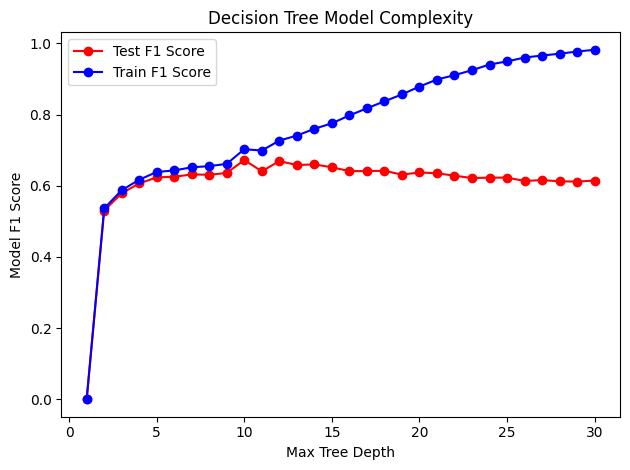

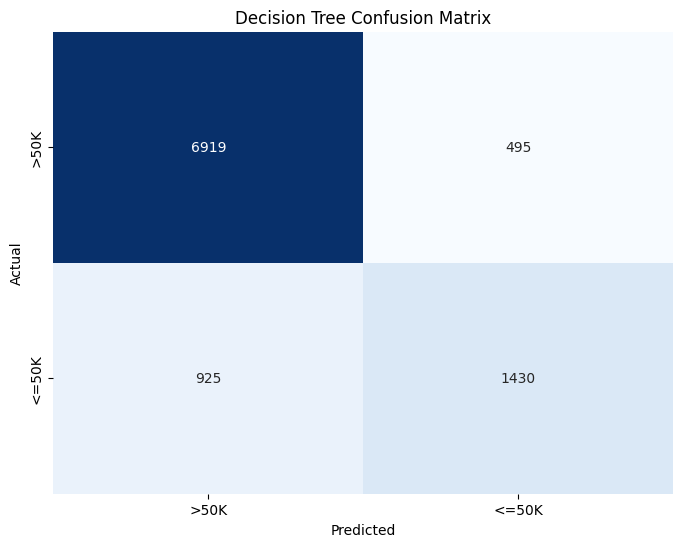

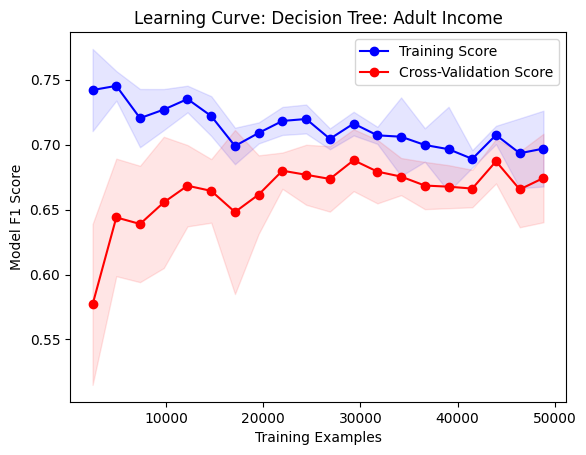

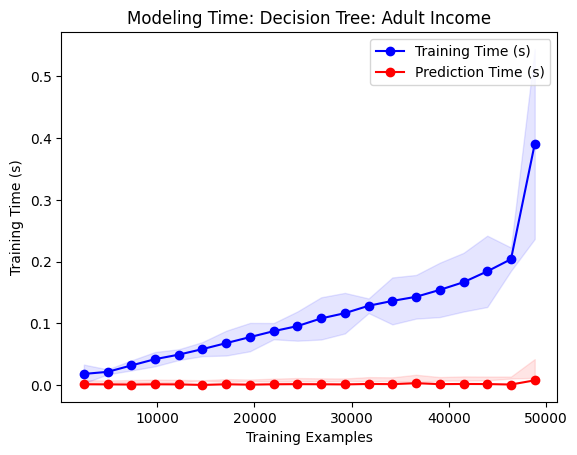

(array([ 2442,  4884,  7326,  9768, 12210, 14652, 17094, 19536, 21978,
        24420, 26863, 29305, 31747, 34189, 36631, 39073, 41515, 43957,
        46399, 48842]),
 array([0.74197712, 0.74520129, 0.72035086, 0.72692578, 0.7350565 ,
        0.72194969, 0.69892796, 0.70896305, 0.71818866, 0.71969644,
        0.70441346, 0.71614873, 0.70711859, 0.70604742, 0.69970071,
        0.69644833, 0.68900033, 0.70738348, 0.6933282 , 0.69690527]),
 array([0.01796017, 0.02131248, 0.03167982, 0.04186573, 0.04920588,
        0.05816131, 0.06787095, 0.07761579, 0.08724923, 0.09544215,
        0.10789537, 0.1163837 , 0.1283525 , 0.13621812, 0.14292521,
        0.15408182, 0.16656156, 0.18412805, 0.20381355, 0.39046736]),
 array([0.00542183, 0.00534554, 0.00649614, 0.00648851, 0.00643873,
        0.007477  , 0.00725427, 0.00773377, 0.00793829, 0.00850925,
        0.00834255, 0.00865593, 0.00943613, 0.00955544, 0.01070261,
        0.01000834, 0.01054664, 0.01061006, 0.01210704, 0.02681327]))

In [23]:
#Running through Decision Tree Classifier - Adult Income Dataset
X,y = grab_adult_income_dataset()
x_train, x_test, y_train, y_test = preprocess_adult_income_data(X, y, test_size=0.2, random_state=42)

best_params_dt, best_dt_classifier = grid_search_decision_tree(x_train, y_train)
print("Best Hyperparameters for Decision Tree:", best_params_dt)

evaluate_classifier(best_dt_classifier, x_train, y_train, x_test, y_test)

hyperTree(x_train, y_train, x_test, y_test, "Decision Tree Model Complexity")

print("")
print("")
# Assuming trained_dt_classifier, X_test, and y_test are already defined
class_names = ['>50K', '<=50K']
plot_confusion_matrix(best_dt_classifier, x_test, y_test, class_names, 'Decision Tree Confusion Matrix')

plot_learning_curve(best_dt_classifier, X, y, title="Decision Tree: Adult Income")



In [36]:
#Running through Decision Tree Classifier - Breast Cancer Detection
X,y = grab_breast_cancer_dataset()
x_train, x_test, y_train, y_test = preprocess_data(X, y, test_size=0.2, random_state=42)

best_params_dt, best_dt_classifier = grid_search_decision_tree(x_train, y_train)
print("Best Hyperparameters for Decision Tree:", best_params_dt)

evaluate_classifier(best_dt_classifier, x_train, y_train, x_test, y_test)

hyperTree(x_train, y_train, x_test, y_test, "Decision Tree Model Complexity")

print("")
print("")
# Assuming trained_dt_classifier, X_test, and y_test are already defined
class_names = ['Benign', 'Malignant']
plot_confusion_matrix(best_dt_classifier, x_test, y_test, class_names, 'Decision Tree Confusion Matrix')

plot_learning_curve(best_dt_classifier, X, y, title="Decision Tree Breast Cancer")



KeyboardInterrupt: 

In [37]:
#Functions for Boosted Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def grid_search_boosted_decision_tree(X_train, y_train, cv=5):

    param_grid = {
    'n_estimators': [50, 100, 150],          # Number of weak learners (trees)
    'learning_rate': [0.01, 0.1, 0.2],       # Weighting of weak learners
    'base_estimator__max_depth': [1, 2, 3],  # Maximum depth of the weak learners (Decision Trees)
    'base_estimator__criterion': ['gini', 'entropy']  # Criterion for weak learners
    }
    base_estimator = DecisionTreeClassifier()

    boosted_dt_classifier = AdaBoostClassifier(estimator=base_estimator)

    grid_search = GridSearchCV(boosted_dt_classifier, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    return best_params, best_estimator

def hyperBoostedTree(X_train, y_train, X_test, y_test, title, param_grid):
    f1_test = []
    f1_train = []

    for params in param_grid:
        clf = AdaBoostClassifier(**params, random_state=50)
        clf.fit(X_train, y_train)

        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)

        f1_test.append(f1_score(y_test, y_pred_test))
        f1_train.append(f1_score(y_train, y_pred_train))

    plt.plot([str(params) for params in param_grid], f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot([str(params) for params in param_grid], f1_train, 'o-', color='b', label='Train F1 Score')

    plt.ylabel('Model F1 Score')
    plt.xlabel('Hyperparameters')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


Best Hyperparameters for Boosted Decision Tree: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 150}
Accuracy: 0.8721
Precision: 0.7983
Recall: 0.6285
F1 Score: 0.7033


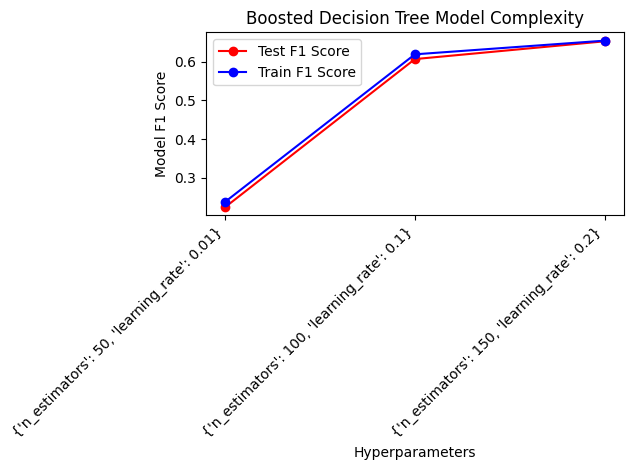

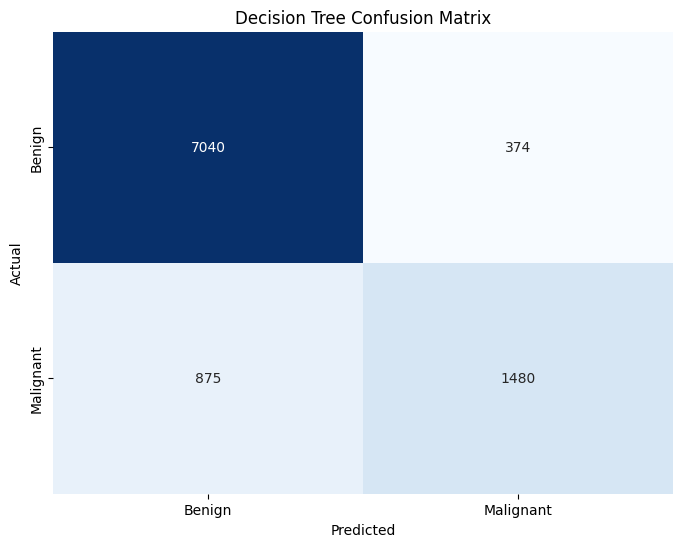

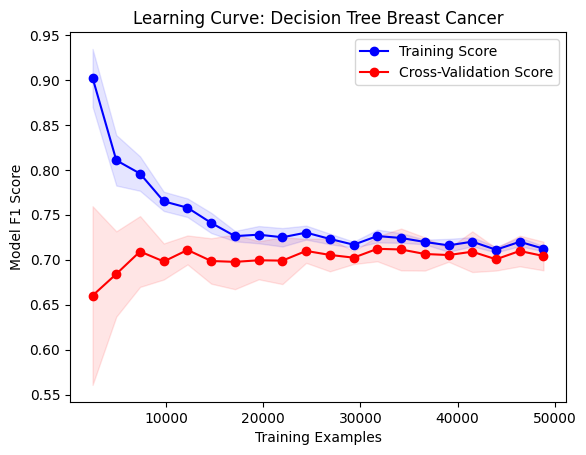

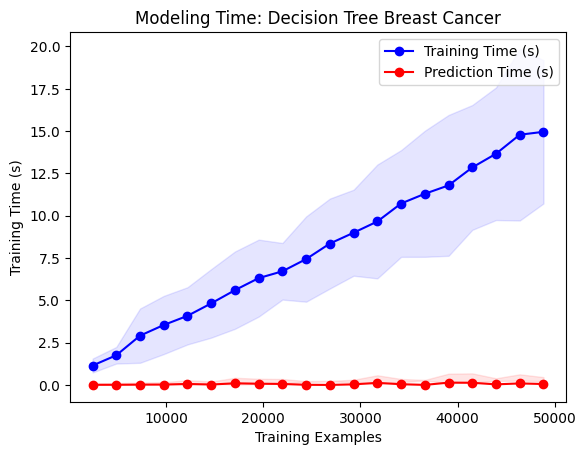

(array([ 2442,  4884,  7326,  9768, 12210, 14652, 17094, 19536, 21978,
        24420, 26863, 29305, 31747, 34189, 36631, 39073, 41515, 43957,
        46399, 48842]),
 array([0.9022444 , 0.81056306, 0.79579548, 0.76493534, 0.75784082,
        0.74094518, 0.72624805, 0.72788795, 0.72498561, 0.73017112,
        0.72314068, 0.71674266, 0.72634176, 0.72419684, 0.71978223,
        0.71600118, 0.72009925, 0.71115899, 0.71995923, 0.71234444]),
 array([ 1.15039773,  1.75846324,  2.91597419,  3.54695821,  4.08767762,
         4.82437968,  5.60509119,  6.31597285,  6.71939182,  7.44132442,
         8.35874968,  8.99794326,  9.66217694, 10.72381239, 11.29796457,
        11.79354095, 12.85385199, 13.66371698, 14.7872788 , 14.95847597]),
 array([0.06442118, 0.08328757, 0.1011785 , 0.11641755, 0.15872407,
        0.14741707, 0.22467499, 0.21666145, 0.22987046, 0.20584745,
        0.2321732 , 0.23529935, 0.3198    , 0.26410718, 0.28798881,
        0.38736215, 0.4219285 , 0.32053957, 0.44430218, 0.3489

In [38]:
#Running through Boosted Decision Tree Classifier and Graphs - Income

X,y = grab_adult_income_dataset()
x_train, x_test, y_train, y_test = preprocess_adult_income_data(X, y, test_size=0.2, random_state=42)

best_params_ab, best_ab_classifier = grid_search_boosted_decision_tree(x_train, y_train)
print("Best Hyperparameters for Boosted Decision Tree:", best_params_ab)

evaluate_classifier(best_ab_classifier, x_train, y_train, x_test, y_test)


param_grid_ab = [
    {'n_estimators': 50, 'learning_rate': 0.01},
    {'n_estimators': 100, 'learning_rate': 0.1},
    {'n_estimators': 150, 'learning_rate': 0.2}
]

hyperBoostedTree(x_train, y_train, x_test, y_test, "Boosted Decision Tree Model Complexity", param_grid_ab)

class_names = ['Benign', 'Malignant']
plot_confusion_matrix(best_ab_classifier, x_test, y_test, class_names, 'Decision Tree Confusion Matrix')

plot_learning_curve(best_ab_classifier, X, y, title="Decision Tree Breast Cancer")



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


Best Hyperparameters for Boosted Decision Tree: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 1, 'learning_rate': 0.2, 'n_estimators': 100}
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1 Score: 0.9647


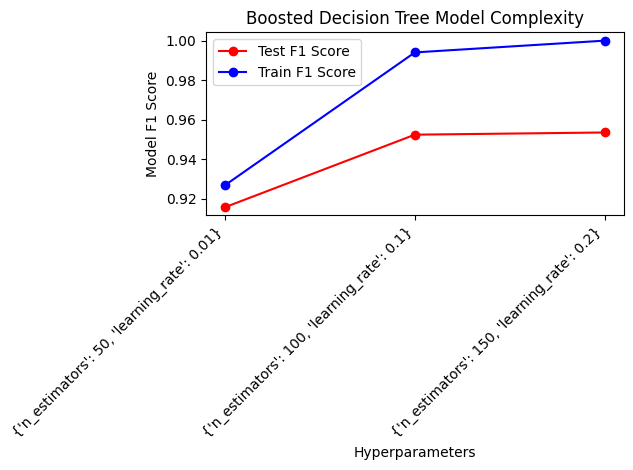

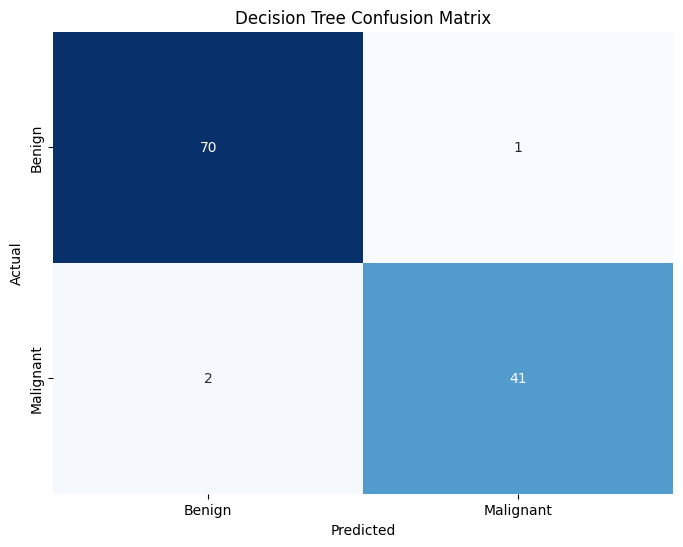

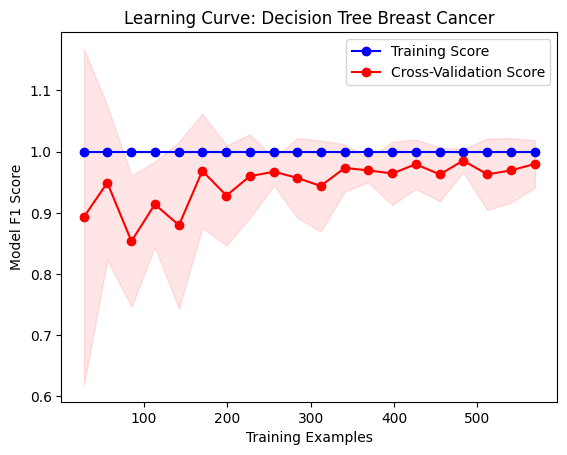

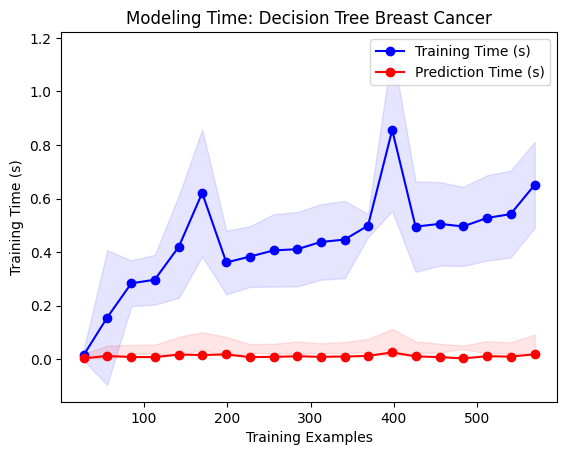

(array([ 28,  56,  85, 113, 142, 170, 199, 227, 256, 284, 312, 341, 369,
        398, 426, 455, 483, 512, 540, 569]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]),
 array([0.01655064, 0.15577121, 0.28375206, 0.29682159, 0.42031984,
        0.62073517, 0.36146636, 0.3831871 , 0.40661058, 0.41075397,
        0.43763323, 0.44700541, 0.49897218, 0.85585785, 0.49523425,
        0.5054081 , 0.49592457, 0.52776818, 0.54174809, 0.65148606]),
 array([0.01332822, 0.02594404, 0.0371757 , 0.03784499, 0.04839125,
        0.06899252, 0.04733343, 0.04054441, 0.0399332 , 0.04377556,
        0.04105997, 0.04389896, 0.05120506, 0.06170378, 0.04483991,
        0.04154921, 0.04500737, 0.04461665, 0.04348526, 0.05518751]))

In [27]:
#Running Boosted Decision Tree Classifier and Graphs - Breast Cancer Detection
X,y = grab_breast_cancer_dataset()
x_train, x_test, y_train, y_test = preprocess_data(X, y, test_size=0.2, random_state=42)


best_params_ab, best_ab_classifier = grid_search_boosted_decision_tree(x_train, y_train)
print("Best Hyperparameters for Boosted Decision Tree:", best_params_ab)

evaluate_classifier(best_ab_classifier, x_train, y_train, x_test, y_test)


param_grid_ab = [
    {'n_estimators': 50, 'learning_rate': 0.01},
    {'n_estimators': 100, 'learning_rate': 0.1},
    {'n_estimators': 150, 'learning_rate': 0.2}
]

hyperBoostedTree(x_train, y_train, x_test, y_test, "Boosted Decision Tree Model Complexity", param_grid_ab)

class_names = ['Benign', 'Malignant']
plot_confusion_matrix(best_ab_classifier, x_test, y_test, class_names, 'Decision Tree Confusion Matrix')

plot_learning_curve(best_ab_classifier, X, y, title="Decision Tree Breast Cancer")


In [28]:
#Support Vector Machines
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


def grid_search_svm(X_train, y_train, cv=5):
    param_grid = {
        'C': [0.1, 1],          # Regularization parameter
        'kernel': ['linear'],    # Kernel type
        'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf' and 'poly'
    }

    svm_classifier = SVC()

    randomized_search = RandomizedSearchCV(svm_classifier, param_distributions=param_grid, n_iter=10, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42)

    randomized_search.fit(X_train, y_train)

    # = GridSearchCV(svm_classifier, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    #grid_search.fit(X_train, y_train)

    best_params = randomized_search.best_params_
    best_estimator = randomized_search.best_estimator_

    #return best_params, best_estimator
    return randomized_search.best_params_, randomized_search.best_estimator_

def hyperSVM(X_train, y_train, X_test, y_test, title):
    f1_test = []
    f1_train = []

    param_grid = [
    (0.1, 'linear', 'scale'),
    (1, 'rbf', 'auto'),
    (10, 'linear', 0.1),
    ]

    for C, kernel, gamma in param_grid:
        svm_classifier = SVC(C=C, kernel=kernel, gamma=gamma)
        svm_classifier.fit(X_train, y_train)

        y_pred_test = svm_classifier.predict(X_test)
        y_pred_train = svm_classifier.predict(X_train)

        f1_test.append(f1_score(y_test, y_pred_test))
        f1_train.append(f1_score(y_train, y_pred_train))


    plt.plot([str(params) for params in param_grid], f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot([str(params) for params in param_grid], f1_train, 'o-', color='b', label='Train F1 Score')

    plt.ylabel('Model F1 Score')
    plt.xlabel('Hyperparameters')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


Accuracy: 0.7971
Precision: 0.9698
Recall: 0.1635
F1 Score: 0.2798


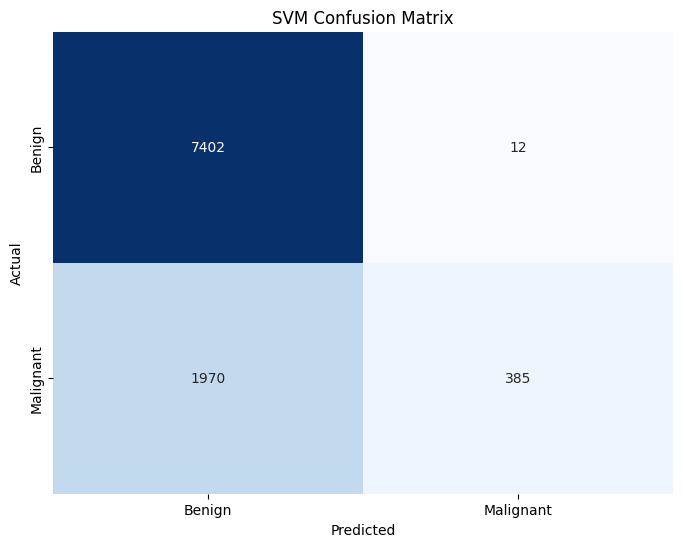

KeyboardInterrupt: 

In [39]:
#Running through SVM Classifier -
#Adult Income
from sklearn.svm import SVC

X,y = grab_adult_income_dataset()
x_train, x_test, y_train, y_test = preprocess_adult_income_data(X, y, test_size=0.2, random_state=42)

#best_params_svm, best_svm_classifier = grid_search_svm(x_train, y_train)
#print("Best Hyperparameters for SVM:", best_params_svm)


best_svm_classifier = SVC(C=1, kernel='rbf')

# Example usage with data
best_svm_classifier.fit(x_train, y_train)

# Now you can use the trained classifier for predictions or evaluations
y_pred_train = best_svm_classifier.predict(x_train)
y_pred_test = best_svm_classifier.predict(x_test)

evaluate_classifier(best_svm_classifier, x_train, y_train, x_test, y_test)

#hyperSVM(x_train, y_train, x_test, y_test, 'SVM Hyperparameter Tuning')

plot_confusion_matrix(best_svm_classifier, x_test, y_test, class_names, 'SVM Confusion Matrix')

plot_learning_curve(best_svm_classifier, X, y, title="SVM Breast Cancer")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}
Accuracy: 0.9561
Precision: 0.9750
Recall: 0.9070
F1 Score: 0.9398


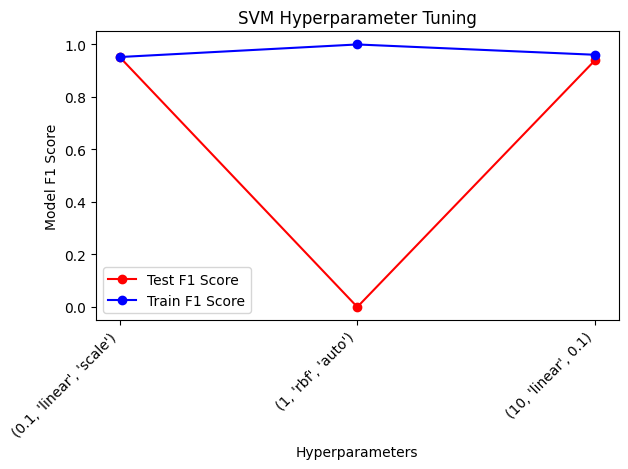

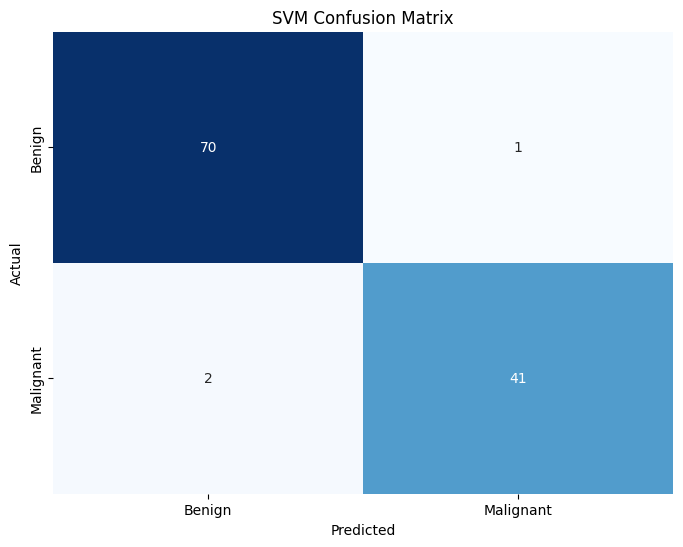

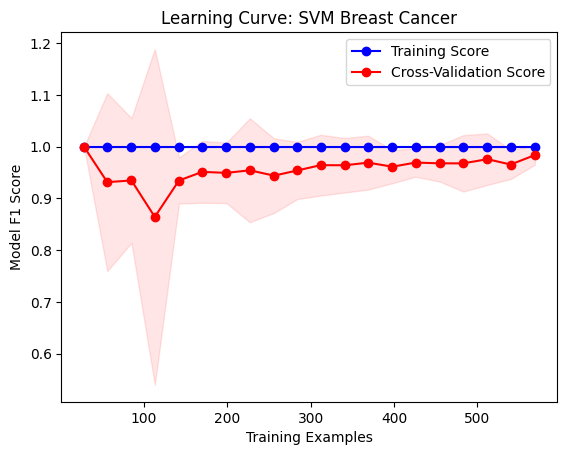

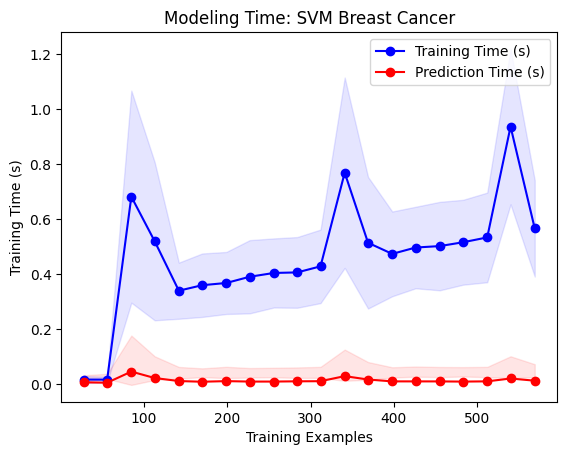

(array([ 28,  56,  85, 113, 142, 170, 199, 227, 256, 284, 312, 341, 369,
        398, 426, 455, 483, 512, 540, 569]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]),
 array([0.01589499, 0.01568418, 0.68109274, 0.51896982, 0.33907928,
        0.35903335, 0.36718125, 0.38978605, 0.40357733, 0.40556679,
        0.42765512, 0.76816926, 0.51343775, 0.47294617, 0.4960299 ,
        0.50129986, 0.51523156, 0.53282394, 0.93580871, 0.56564426]),
 array([0.0200171 , 0.02772737, 0.08615732, 0.05743818, 0.04077611,
        0.04067421, 0.04179678, 0.0405664 , 0.04150424, 0.0409493 ,
        0.04213858, 0.06807199, 0.04754062, 0.04190025, 0.04487233,
        0.04319954, 0.04409757, 0.04327979, 0.06100397, 0.04813347]))

In [29]:
#Running through SVM Classifier - Breast Cancer Detection
X,y = grab_breast_cancer_dataset()
x_train, x_test, y_train, y_test = preprocess_data(X, y, test_size=0.2, random_state=42)
best_params_svm, best_svm_classifier = grid_search_svm(x_train, y_train)
print("Best Hyperparameters for SVM:", best_params_svm)

evaluate_classifier(best_svm_classifier, x_train, y_train, x_test, y_test)

hyperSVM(x_train, y_train, x_test, y_test, 'SVM Hyperparameter Tuning')

plot_confusion_matrix(best_ab_classifier, x_test, y_test, class_names, 'SVM Confusion Matrix')

plot_learning_curve(best_ab_classifier, X, y, title="SVM Breast Cancer")


In [30]:
#Functions for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def grid_search_knn(X_train, y_train, cv=5):
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],          # Number of neighbors
        'weights': ['uniform', 'distance'],   # Weight function used in prediction
        'p': [1, 2]                           # Power parameter for the Minkowski distance
    }

    knn_classifier = KNeighborsClassifier()

    grid_search = GridSearchCV(knn_classifier, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    return best_params, best_estimator

def hyperKNN(X_train, y_train, X_test, y_test, title):
    f1_test = []
    f1_train = []


    param_grid = [
        {'n_neighbors': 3, 'weights': 'uniform', 'p': 1},
        {'n_neighbors': 3, 'weights': 'uniform', 'p': 2},
        {'n_neighbors': 3, 'weights': 'distance', 'p': 1},
        {'n_neighbors': 3, 'weights': 'distance', 'p': 2},
        {'n_neighbors': 5, 'weights': 'uniform', 'p': 1},
        {'n_neighbors': 5, 'weights': 'uniform', 'p': 2},
        {'n_neighbors': 5, 'weights': 'distance', 'p': 1},
        {'n_neighbors': 5, 'weights': 'distance', 'p': 2},
        {'n_neighbors': 7, 'weights': 'uniform', 'p': 1},
        {'n_neighbors': 7, 'weights': 'uniform', 'p': 2},
        {'n_neighbors': 7, 'weights': 'distance', 'p': 1},
        {'n_neighbors': 7, 'weights': 'distance', 'p': 2},
        {'n_neighbors': 9, 'weights': 'uniform', 'p': 1},
        {'n_neighbors': 9, 'weights': 'uniform', 'p': 2},
        {'n_neighbors': 9, 'weights': 'distance', 'p': 1},
        {'n_neighbors': 9, 'weights': 'distance', 'p': 2},
    ]

    for params in param_grid:
        knn_classifier = KNeighborsClassifier(**params)
        knn_classifier.fit(X_train, y_train)

        y_pred_test = knn_classifier.predict(X_test)
        y_pred_train = knn_classifier.predict(X_train)

        f1_test.append(f1_score(y_test, y_pred_test))
        f1_train.append(f1_score(y_train, y_pred_train))

    plt.plot([str(params) for params in param_grid], f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot([str(params) for params in param_grid], f1_train, 'o-', color='b', label='Train F1 Score')

    plt.ylabel('Model F1 Score')
    plt.xlabel('Hyperparameters')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


Best Hyperparameters for KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.7919
Precision: 0.6566
Recall: 0.2866
F1 Score: 0.3991


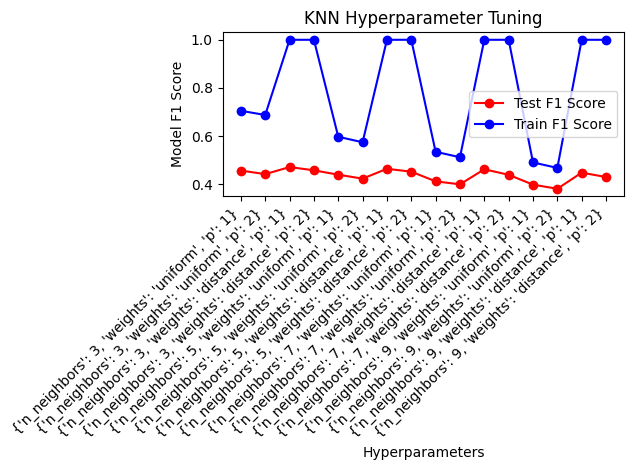

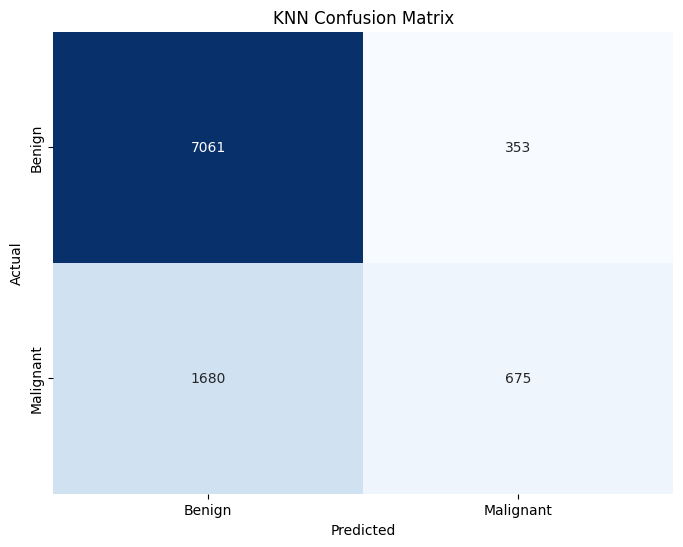

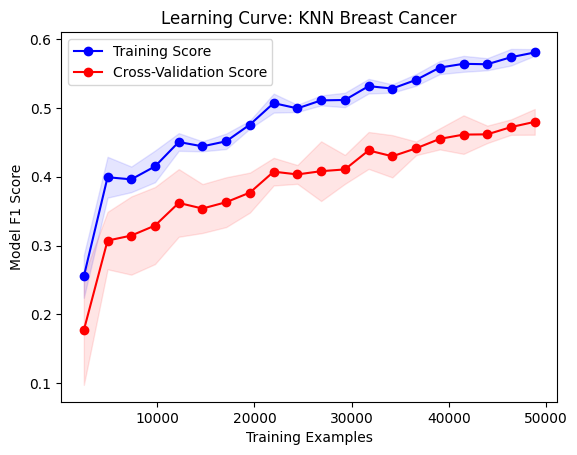

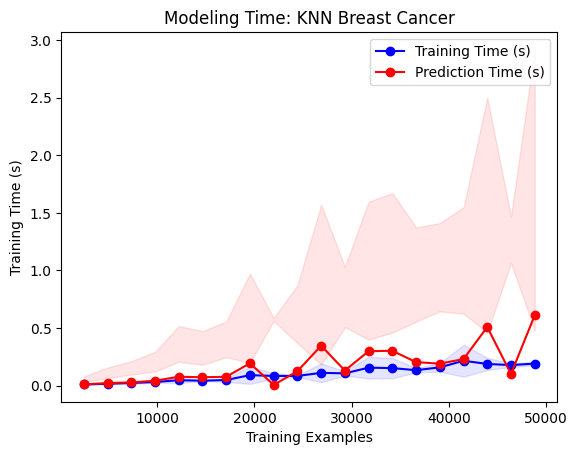

(array([ 2442,  4884,  7326,  9768, 12210, 14652, 17094, 19536, 21978,
        24420, 26863, 29305, 31747, 34189, 36631, 39073, 41515, 43957,
        46399, 48842]),
 array([0.25508063, 0.39924581, 0.3961737 , 0.41503027, 0.45047996,
        0.44415903, 0.45151799, 0.47583508, 0.50698484, 0.49933466,
        0.51098524, 0.51156096, 0.53164333, 0.52819088, 0.5407414 ,
        0.55868155, 0.56410741, 0.56350149, 0.57371004, 0.58065417]),
 array([0.01032877, 0.01653728, 0.02386408, 0.03183799, 0.04742904,
        0.04334903, 0.04921441, 0.09139829, 0.08467193, 0.08437243,
        0.11155152, 0.10693574, 0.15642738, 0.15253763, 0.13456407,
        0.15902486, 0.21626101, 0.18868957, 0.17881742, 0.19172325]),
 array([0.05725975, 0.11148076, 0.15470786, 0.20846701, 0.36299329,
        0.32764788, 0.40203576, 0.58528972, 0.574544  , 0.62125664,
        0.87605333, 0.77047176, 0.99809299, 1.06646171, 0.96460457,
        1.02826076, 1.08659439, 1.48079677, 1.26706653, 1.7008657 ]))

In [41]:
#Running through KNN search

#Adult Income
X,y = grab_adult_income_dataset()
x_train, x_test, y_train, y_test = preprocess_adult_income_data(X, y, test_size=0.2, random_state=42)

best_params_knn, best_knn_classifier = grid_search_knn(x_train, y_train)
print("Best Hyperparameters for KNN:", best_params_knn)

evaluate_classifier(best_knn_classifier, x_train, y_train, x_test, y_test)

hyperKNN(x_train, y_train, x_test, y_test, 'KNN Hyperparameter Tuning')

plot_confusion_matrix(best_knn_classifier, x_test, y_test, class_names, 'KNN Confusion Matrix')

plot_learning_curve(best_knn_classifier, X, y, title="KNN Breast Cancer")

Best Hyperparameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Accuracy: 0.9386
Precision: 0.9737
Recall: 0.8605
F1 Score: 0.9136


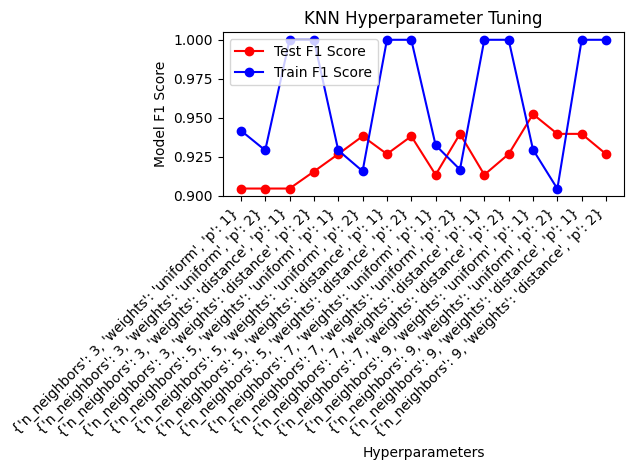

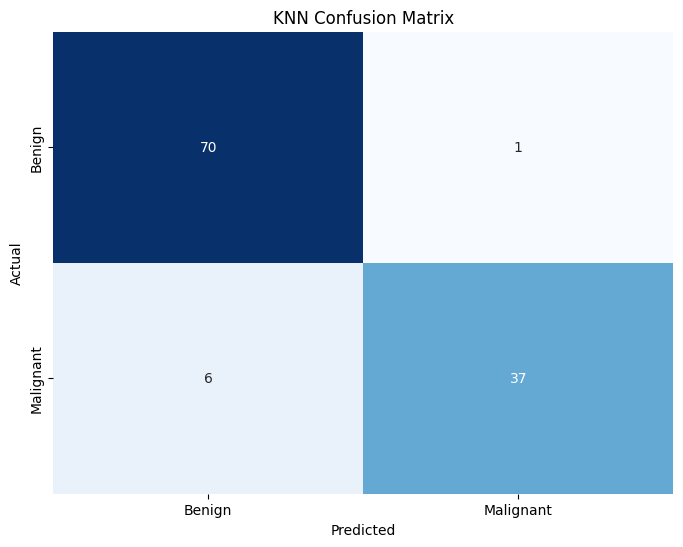

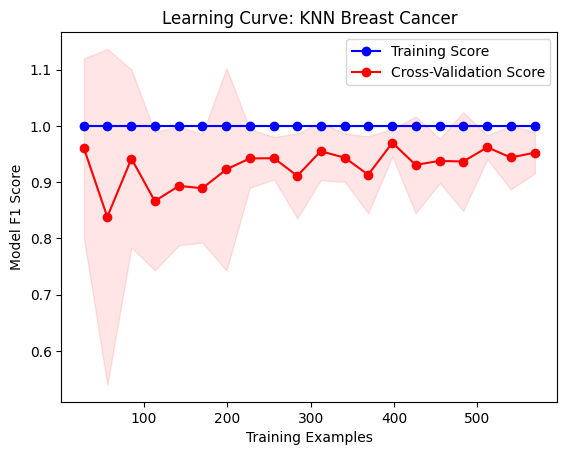

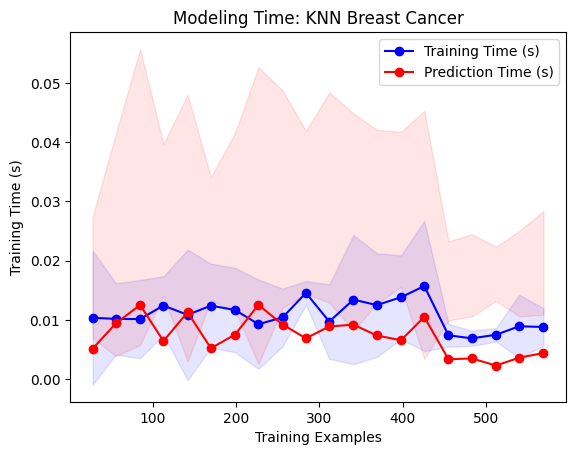

(array([ 28,  56,  85, 113, 142, 170, 199, 227, 256, 284, 312, 341, 369,
        398, 426, 455, 483, 512, 540, 569]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]),
 array([0.01033635, 0.01015501, 0.01011887, 0.01241107, 0.01083183,
        0.01239352, 0.0116468 , 0.00925641, 0.01040492, 0.01453795,
        0.0096941 , 0.01341205, 0.01248374, 0.01380124, 0.01569915,
        0.00738134, 0.00686674, 0.00747485, 0.00890994, 0.00878186]),
 array([0.01717768, 0.02266116, 0.03074055, 0.02688446, 0.02546544,
        0.02367415, 0.02655773, 0.02758689, 0.03034525, 0.02811127,
        0.03063774, 0.02650824, 0.02740264, 0.0286171 , 0.02434421,
        0.01657271, 0.01750922, 0.01775479, 0.0177938 , 0.01961737]))

In [40]:
#Running through KNN search #Breast Cancer Dataset

X,y = grab_breast_cancer_dataset()
x_train, x_test, y_train, y_test = preprocess_data(X, y, test_size=0.2, random_state=42)

best_params_knn, best_knn_classifier = grid_search_knn(x_train, y_train)
print("Best Hyperparameters for KNN:", best_params_knn)

evaluate_classifier(best_knn_classifier, x_train, y_train, x_test, y_test)

hyperKNN(x_train, y_train, x_test, y_test, 'KNN Hyperparameter Tuning')

plot_confusion_matrix(best_knn_classifier, x_test, y_test, class_names, 'KNN Confusion Matrix')

plot_learning_curve(best_knn_classifier, X, y, title="KNN Breast Cancer")


In [42]:
#Functions for Nueral Network

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

def grid_search_neural_network(X_train, y_train, cv=5):

    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Number of neurons in each hidden layer
        'activation': ['relu', 'tanh'],                                 # Activation function
        'solver': ['adam', 'sgd'],                                      # Solver for weight optimization
        'learning_rate': ['constant', 'adaptive'],                      # Learning rate schedule
        'alpha': [0.0001, 0.001, 0.01],                                 # L2 penalty (regularization term)
    }

    param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant'],
    'alpha': [0.0001, 0.001, 0.01],
    }

    nn_classifier = MLPClassifier(max_iter=1000)

    grid_search = GridSearchCV(nn_classifier, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    return best_params, best_estimator


Best Hyperparameters for KNN: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy: 0.7816
Precision: 0.8989
Recall: 0.1057
F1 Score: 0.1892


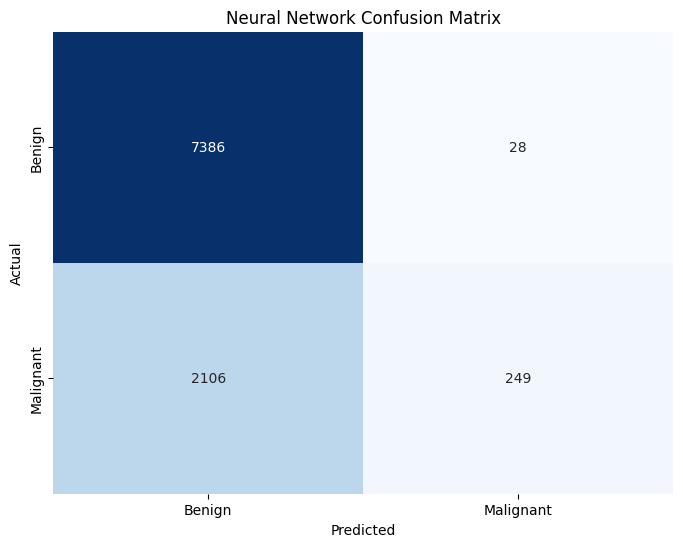

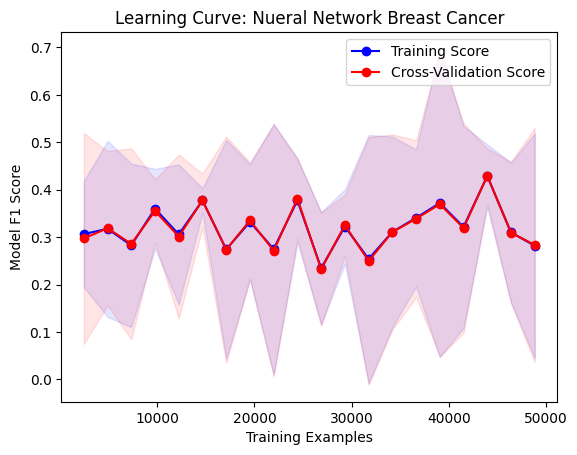

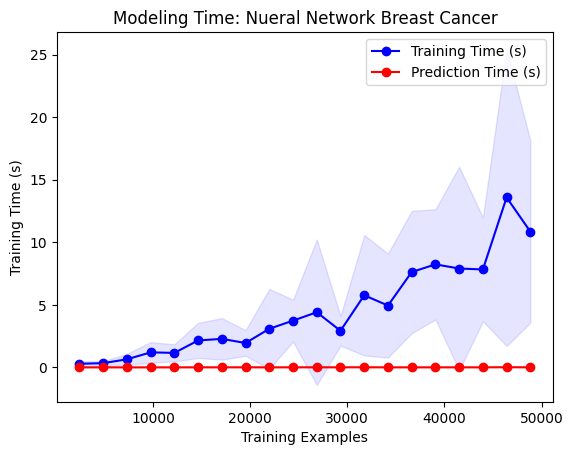

(array([ 2442,  4884,  7326,  9768, 12210, 14652, 17094, 19536, 21978,
        24420, 26863, 29305, 31747, 34189, 36631, 39073, 41515, 43957,
        46399, 48842]),
 array([0.30668851, 0.31751407, 0.28285536, 0.36002551, 0.30589405,
        0.37738919, 0.27439639, 0.33217467, 0.2749834 , 0.37759068,
        0.23450925, 0.32243896, 0.25407442, 0.31105496, 0.34067315,
        0.37191765, 0.32146527, 0.42910664, 0.30990752, 0.28200193]),
 array([ 0.28370776,  0.33735604,  0.64345617,  1.19830232,  1.1561152 ,
         2.15134864,  2.2765121 ,  1.94509268,  3.08146181,  3.73415875,
         4.40482068,  2.9246388 ,  5.76197462,  4.93868952,  7.61536002,
         8.23092527,  7.89942718,  7.82302337, 13.57851305, 10.84628491]),
 array([0.00605063, 0.00792189, 0.00727053, 0.00790524, 0.00957422,
        0.01113586, 0.01151514, 0.01905994, 0.01187234, 0.01406355,
        0.01669898, 0.01811514, 0.01828532, 0.01505804, 0.01648521,
        0.01683874, 0.01812949, 0.01821699, 0.0281743 , 0.0193

In [43]:
#Running through Nueral Network
#Adult Income
X,y = grab_adult_income_dataset()
x_train, x_test, y_train, y_test = preprocess_adult_income_data(X, y, test_size=0.2, random_state=42)

best_params_nn, best_nn_classifier = grid_search_neural_network(x_train, y_train)
print("Best Hyperparameters for KNN:", best_params_nn)

evaluate_classifier(best_nn_classifier, x_train, y_train, x_test, y_test)

plot_confusion_matrix(best_nn_classifier, x_test, y_test, class_names, 'Neural Network Confusion Matrix')

plot_learning_curve(best_nn_classifier, X, y, title="Nueral Network Breast Cancer")

Best Hyperparameters for Nueral Network: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy: 0.9386
Precision: 1.0000
Recall: 0.8372
F1 Score: 0.9114


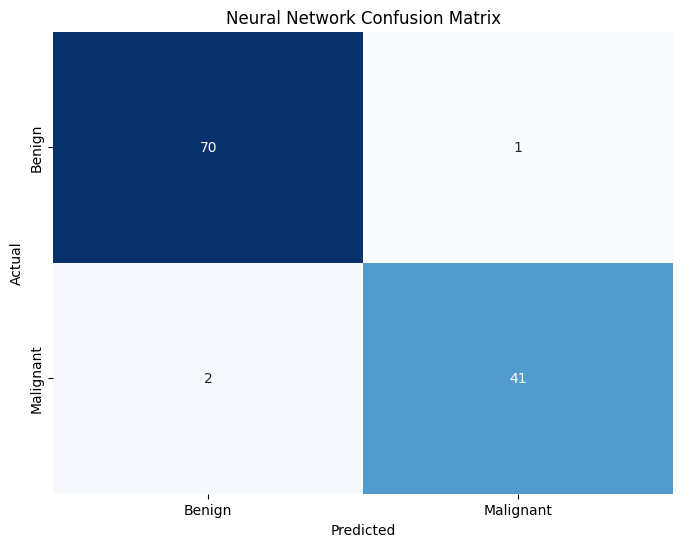

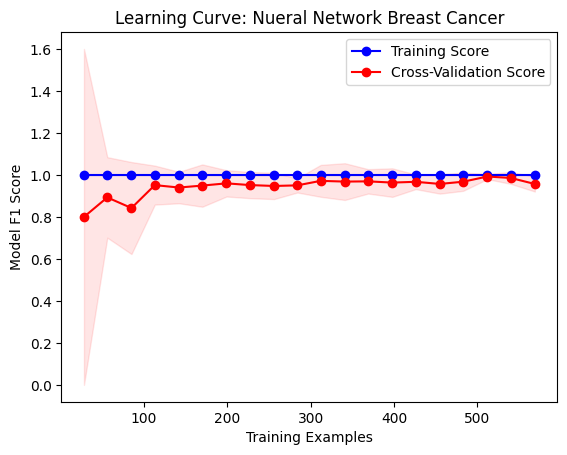

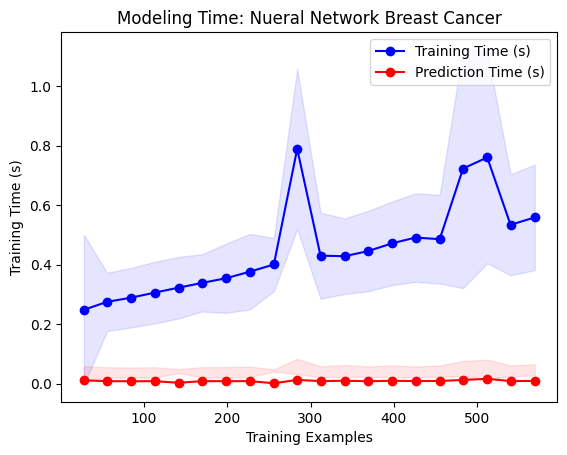

(array([ 28,  56,  85, 113, 142, 170, 199, 227, 256, 284, 312, 341, 369,
        398, 426, 455, 483, 512, 540, 569]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]),
 array([0.2486928 , 0.27528329, 0.28953791, 0.3062499 , 0.32315092,
        0.33899131, 0.35488787, 0.37652941, 0.40082035, 0.7892746 ,
        0.43043261, 0.42879982, 0.44579539, 0.47211218, 0.49136047,
        0.48583961, 0.72340355, 0.7605557 , 0.53422027, 0.55906096]),
 array([0.03633819, 0.03782411, 0.03769212, 0.03810959, 0.04275184,
        0.03834677, 0.03882627, 0.04008226, 0.04468274, 0.05786605,
        0.04065309, 0.04305153, 0.04095745, 0.04188199, 0.03982172,
        0.04260211, 0.05046644, 0.04797697, 0.04334898, 0.04696789]))

In [35]:
#Running through Nueral Network

X,y = grab_breast_cancer_dataset()
x_train, x_test, y_train, y_test = preprocess_data(X, y, test_size=0.2, random_state=42)

best_params_nn, best_nn_classifier = grid_search_neural_network(x_train, y_train)
print("Best Hyperparameters for Nueral Network:", best_params_nn)

evaluate_classifier(best_nn_classifier, x_train, y_train, x_test, y_test)

plot_confusion_matrix(best_ab_classifier, x_test, y_test, class_names, 'Neural Network Confusion Matrix')

plot_learning_curve(best_ab_classifier, X, y, title="Nueral Network Breast Cancer")